In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from dogo.wasserstein.wasserstein_distance import experiment_collection_distances, experiment_combination_distances

In [12]:
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [4]:
def display_distances(experiments_dict, mean_arr, std_arr, shape=(2,2), dataset_labels=None):
    fig, ax = plt.subplots(*shape, figsize=(shape[1]*10+2,shape[0]*10+2))

    datasets = list(experiments_dict.keys())
    axis_labels = dataset_labels or datasets
    for i in range(len(datasets)):
        wd_vals_arr = mean_arr[i,:,:]
        mat = ax[i//2, i%2].matshow(wd_vals_arr)
        ax[i//2, i%2].set_xticks(range(len(axis_labels)))
        ax[i//2, i%2].set_yticks(range(len(axis_labels)))
        ax[i//2, i%2].set_xticklabels(axis_labels, rotation=45)
        ax[i//2, i%2].set_yticklabels(axis_labels, rotation=45)

        for (j,k), z in np.ndenumerate(wd_vals_arr):
            if z != 0:
                ax[i//2, i%2].text(k, j, '{:.2f}\n±{:.2f}'.format(mean_arr[i,j,k], std_arr[i,j,k]), ha="center", va="center", color='w' if z < 50 else 'k')

        ax[i//2, i%2].set_title(axis_labels[i])

    if shape[0] > shape[1]:
        ax[(shape[0]-1, shape[1]-1)].remove()

In [14]:
RT_DATASET_LABELS = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
    ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("D4RL-HC-M_10000", "D4RL Medium"),
    ("D4RL-HC-ME_10000", "D4RL Medium-Expert"),
    ("D4RL-HC-MR_10000", "D4RL Medium-Replay"),
    ("D4RL-HC-R_10000", "D4RL Random"),
    ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
    ("SAC-RT-0.5M-4-P0_10000", "Softlearning 1 - 0.5M Steps"),
    ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
    ("SAC-RT-2M-4-P0_10000", "Softlearning 1 - 2M Steps"),
    ("SAC-RT-3M-4-P0_10000", "Softlearning 1 - 3M Steps"),
    ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("RAND-1", "Random Policy 1"),
    ("RAND-2", "Random Policy 2"),
    ("RAND-3", "Random Policy 3"),
]
RT_EVAL_DATASETS = [i[0] for i in RT_DATASET_LABELS]
RT_EVAL_LABELS = [i[1] for i in RT_DATASET_LABELS]

# D4RL

In [6]:
d4rl_experiments = {
    "D4RL-HC-M_100000" : ['MP521', 'MP522', 'MP523'],
    "D4RL-HC-MR_100000" : ['MP524', 'MP525', 'MP526'],
    "D4RL-HC-ME_100000" : ['MP527', 'MP528', 'MP529'],
    "D4RL-HC-R_100000" : ['MP530', 'MP531', 'MP532'],
}
d4rl_experiment_labels = ['Medium', 'Medium-Replay', 'Medium-Expert', 'Random']

In [7]:
d4rl_wd_mean, d4rl_wd_std = experiment_collection_distances(d4rl_experiments)

KeyboardInterrupt: 

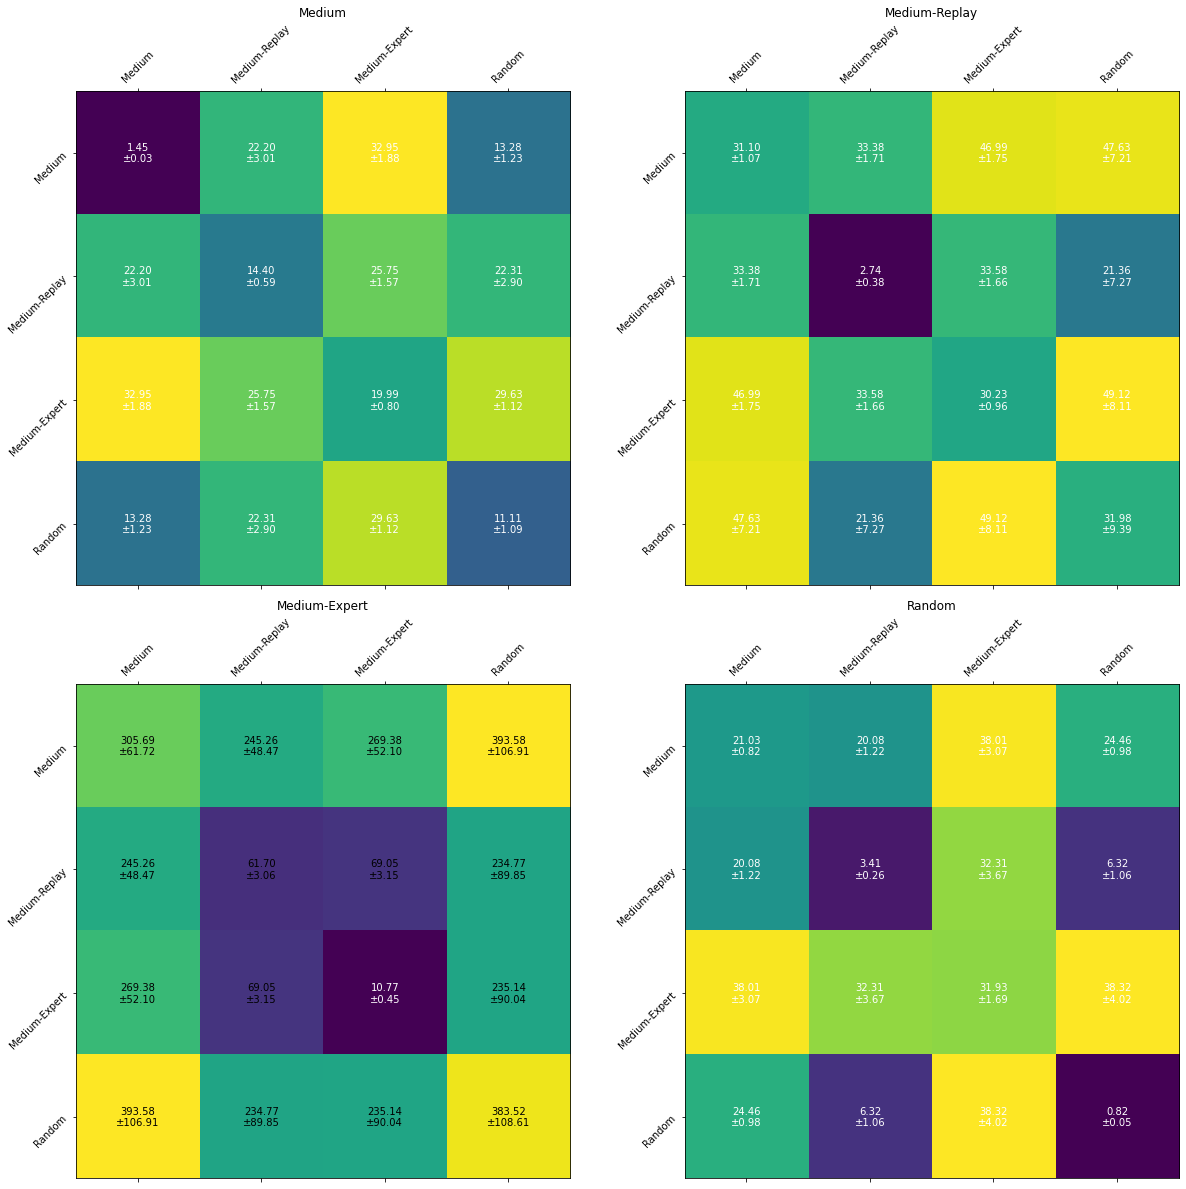

In [ ]:
display_distances(d4rl_experiments, d4rl_wd_mean, d4rl_wd_std, shape=(2,2), dataset_labels=d4rl_experiment_labels)

# D3RLPY

In [7]:
d3rlpy_01_experiments = ['MP449', 'MP450', 'MP451']
d3rlpy_02_experiments = ['MP452', 'MP453', 'MP454']
d3rlpy_05_experiments = ['MP455', 'MP456', 'MP457']
d3rlpy_1_experiments = ['MP458', 'MP459', 'MP460']
d3rlpy_2_experiments = ['MP533', 'MP534', 'MP535']

In [8]:
d3rlpy_training_experiments = {
    "D3RLPY-RT-0.1M-4-P0_10000" : d3rlpy_01_experiments,
    "D3RLPY-RT-0.2M-4-P0_10000" : d3rlpy_02_experiments,
    "D3RLPY-RT-0.5M-4-P0_10000" : d3rlpy_05_experiments,
    "D3RLPY-RT-1M-4-P0_10000"   : d3rlpy_1_experiments,
    "D3RLPY-RT-2M-4-P0_10000"   : d3rlpy_2_experiments,
}
d3rlpy_experiment_labels = ['D3RLPY 0.1M Steps', 'D3RLPY 0.2M Steps', 'D3RLPY 0.5M Steps', 'D3RLPY 1M Steps', 'D3RLPY 2M Steps']

In [21]:
d3rlpy_training_wd_mean, d3rlpy_training_wd_std = experiment_collection_distances(d3rlpy_training_experiments)

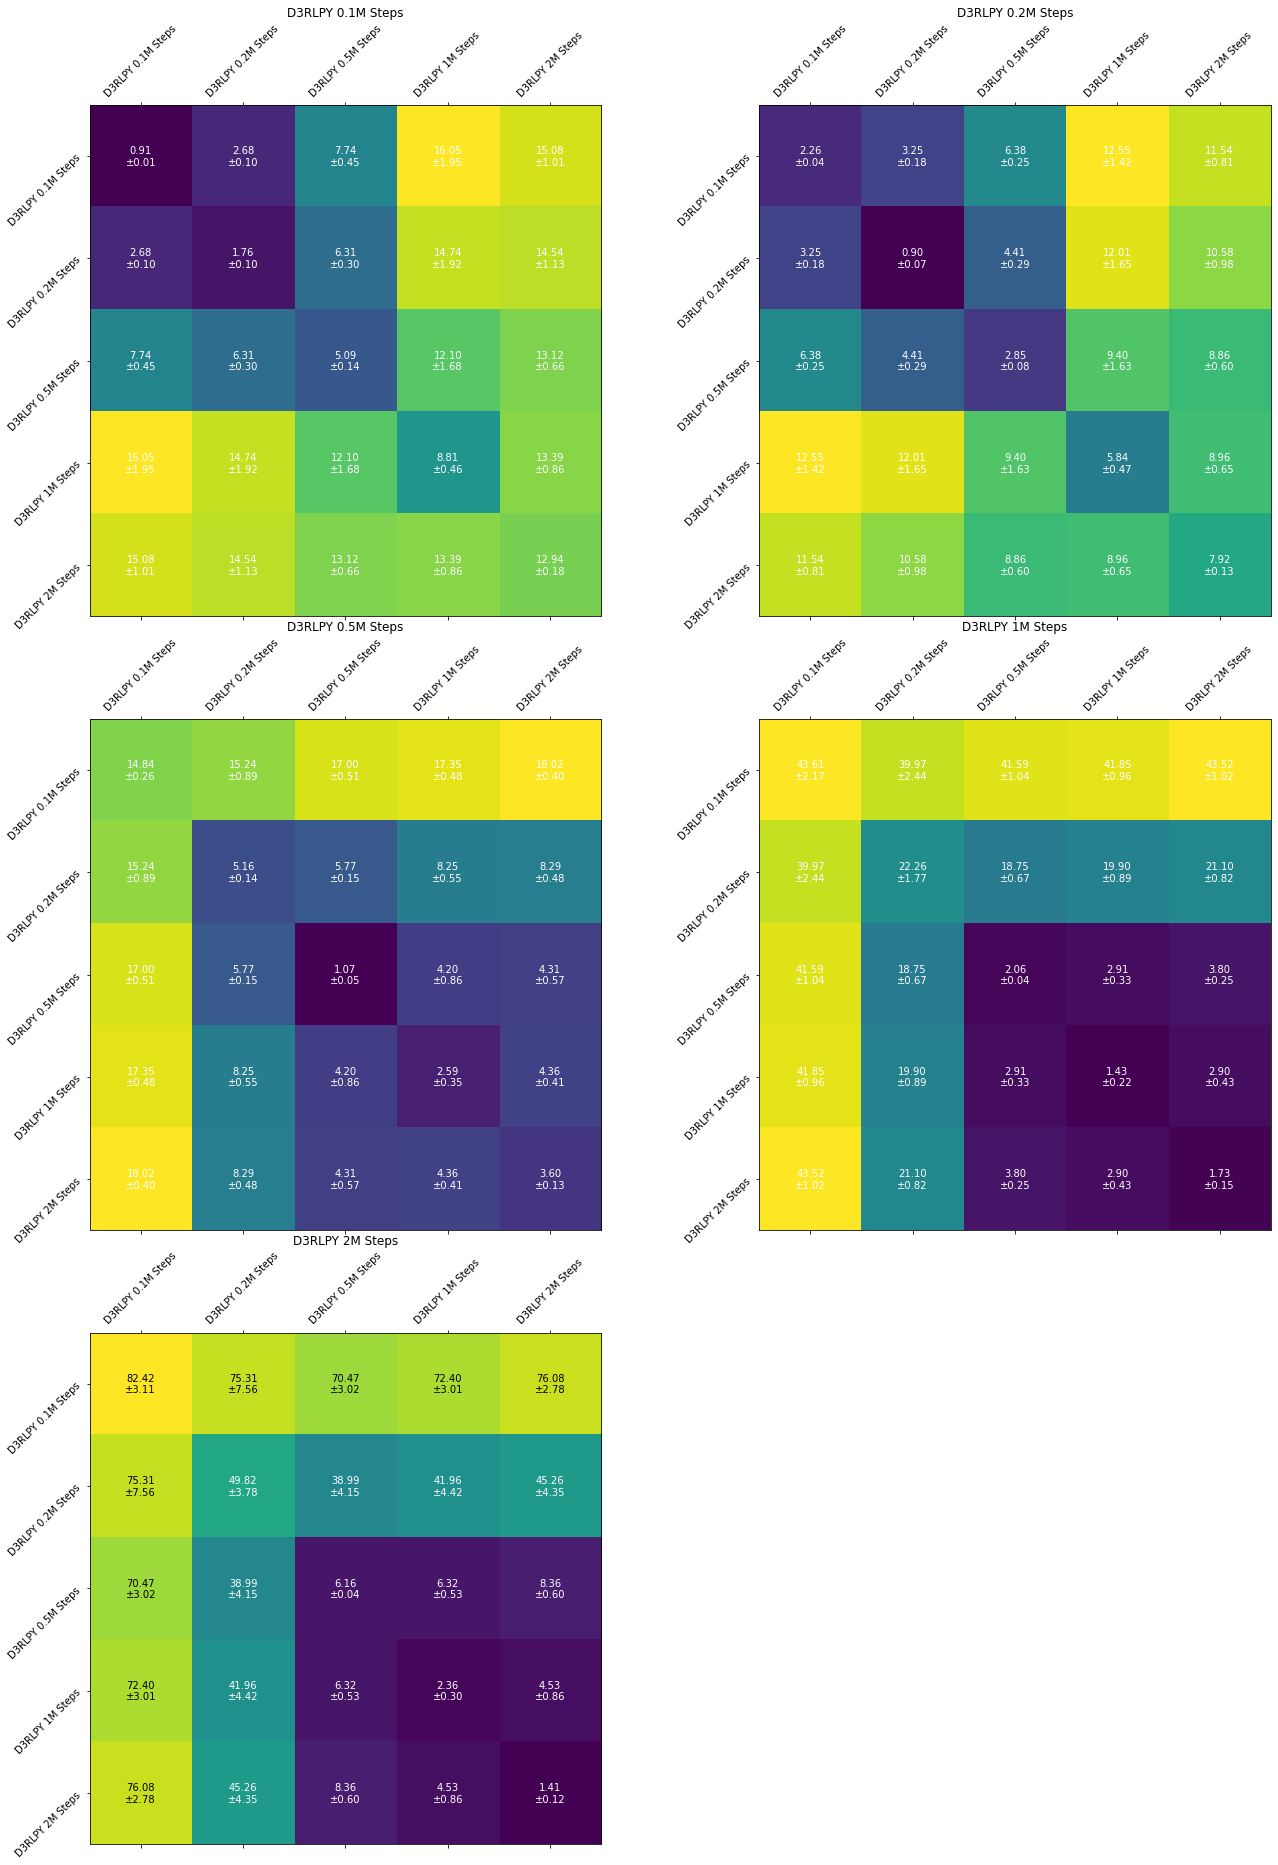

In [47]:
display_distances(d3rlpy_training_experiments, d3rlpy_training_wd_mean, d3rlpy_training_wd_std, shape=(3,2), dataset_labels=d3rlpy_experiment_labels)

In [11]:
d3rlpy_01_wd_arr = experiment_combination_distances(d3rlpy_01_experiments, RT_EVAL_DATASETS)
d3rlpy_02_wd_arr = experiment_combination_distances(d3rlpy_02_experiments, RT_EVAL_DATASETS)
d3rlpy_05_wd_arr = experiment_combination_distances(d3rlpy_05_experiments, RT_EVAL_DATASETS)
d3rlpy_1_wd_arr = experiment_combination_distances(d3rlpy_1_experiments, RT_EVAL_DATASETS)
d3rlpy_2_wd_arr = experiment_combination_distances(d3rlpy_2_experiments, RT_EVAL_DATASETS)

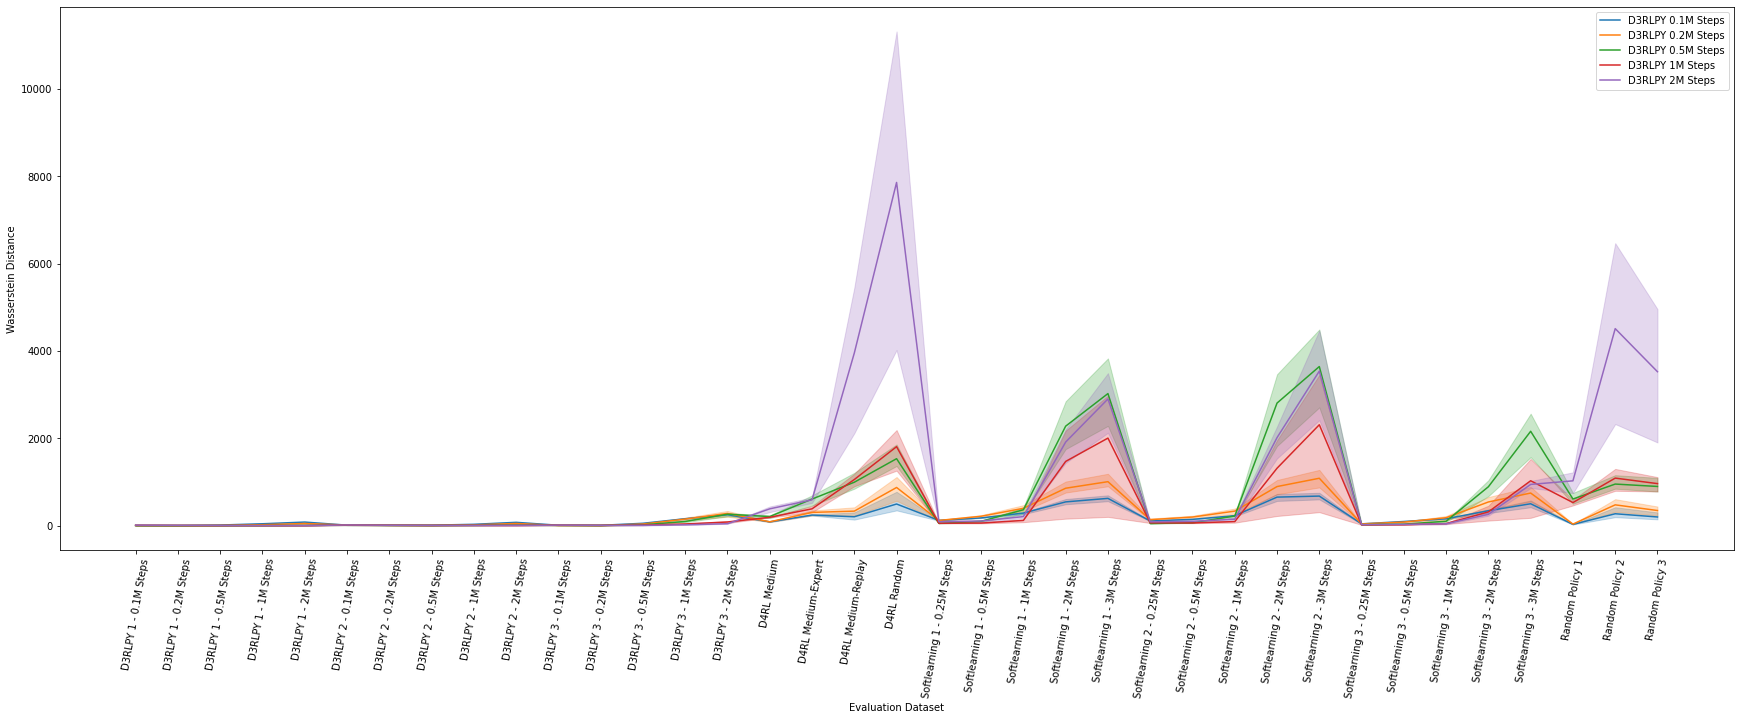

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

for i, wd_arr in enumerate([
    d3rlpy_01_wd_arr,
    d3rlpy_02_wd_arr,
    d3rlpy_05_wd_arr,
    d3rlpy_1_wd_arr,
    d3rlpy_2_wd_arr,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ax.plot(RT_EVAL_DATASETS, plot_avgs, label=d3rlpy_experiment_labels[i], c=cols[i])
    ax.fill_between(RT_EVAL_DATASETS, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), RT_EVAL_LABELS, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.legend()

In [23]:
d3rlpy_01_et_experiments = {
    "D3RLPY-RT-0.1M-4-P0_10000" : ['MP473', 'MP474', 'MP475'],
    "D3RLPY-RT-0.2M-4-P0_10000" : ['MP476', 'MP477', 'MP478'],
    "D3RLPY-RT-0.5M-4-P0_10000" : ['MP479', 'MP480', 'MP481'],
    "D3RLPY-RT-1M-4-P0_10000"   : ['MP482', 'MP483', 'MP484'],
    "D3RLPY-RT-2M-4-P0_10000"   : ['MP536', 'MP537', 'MP538'],
}

In [24]:
d3rlpy_01_et_wd_mean, d3rlpy_01_et_wd_std = experiment_collection_distances(d3rlpy_01_et_experiments)

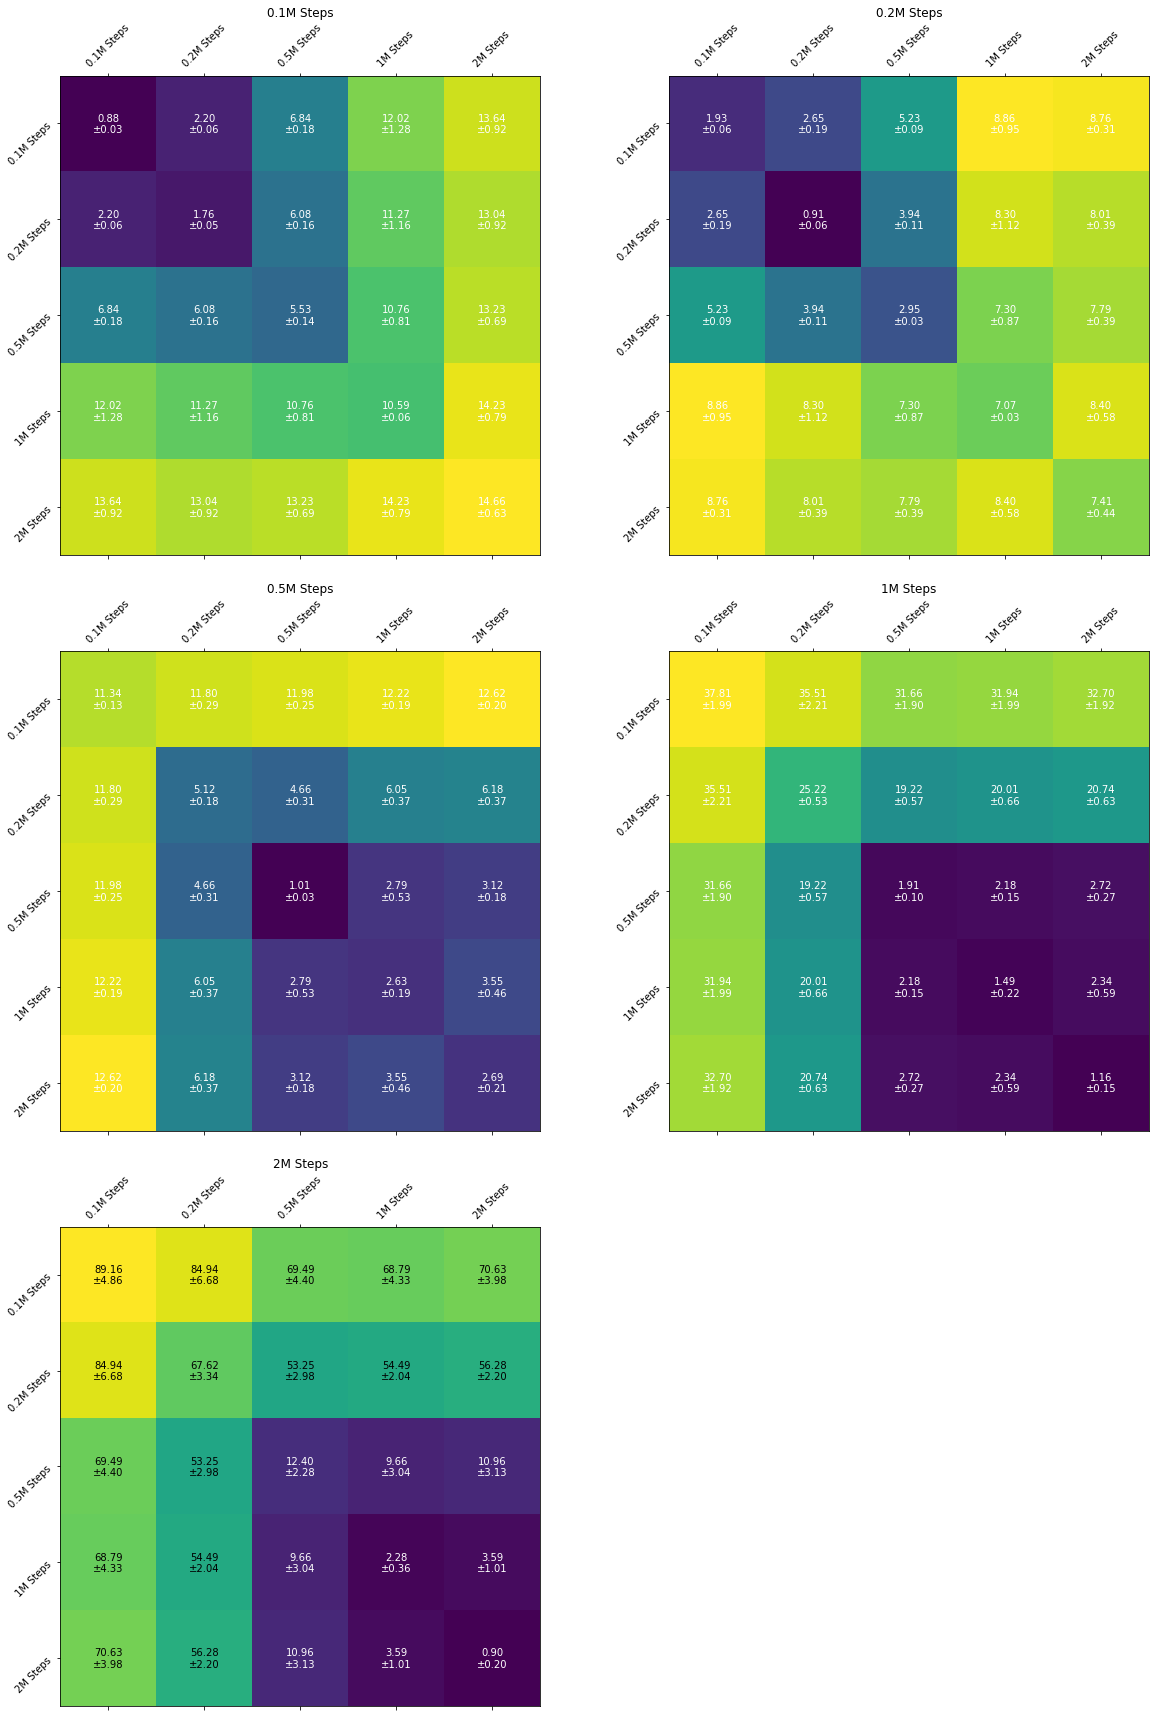

In [37]:
display_distances(d3rlpy_01_et_experiments, d3rlpy_01_et_wd_mean, d3rlpy_01_et_wd_std, shape=(3,2), dataset_labels=d3rlpy_experiment_labels)

In [26]:
d3rlpy_1_experiments = {
    "D3RLPY-RT-0.1M-4-P0_10000" : ['MP497', 'MP498', 'MP499'],
    "D3RLPY-RT-0.2M-4-P0_10000" : ['MP500', 'MP501', 'MP502'],
    "D3RLPY-RT-0.5M-4-P0_10000" : ['MP503', 'MP504', 'MP505'],
    "D3RLPY-RT-1M-4-P0_10000"   : ['MP506', 'MP507', 'MP508'],
    "D3RLPY-RT-2M-4-P0_10000"   : ['MP539', 'MP540', 'MP541'],
}

In [27]:
d3rlpy_1_wd_mean, d3rlpy_1_wd_std = experiment_collection_distances(d3rlpy_1_experiments)

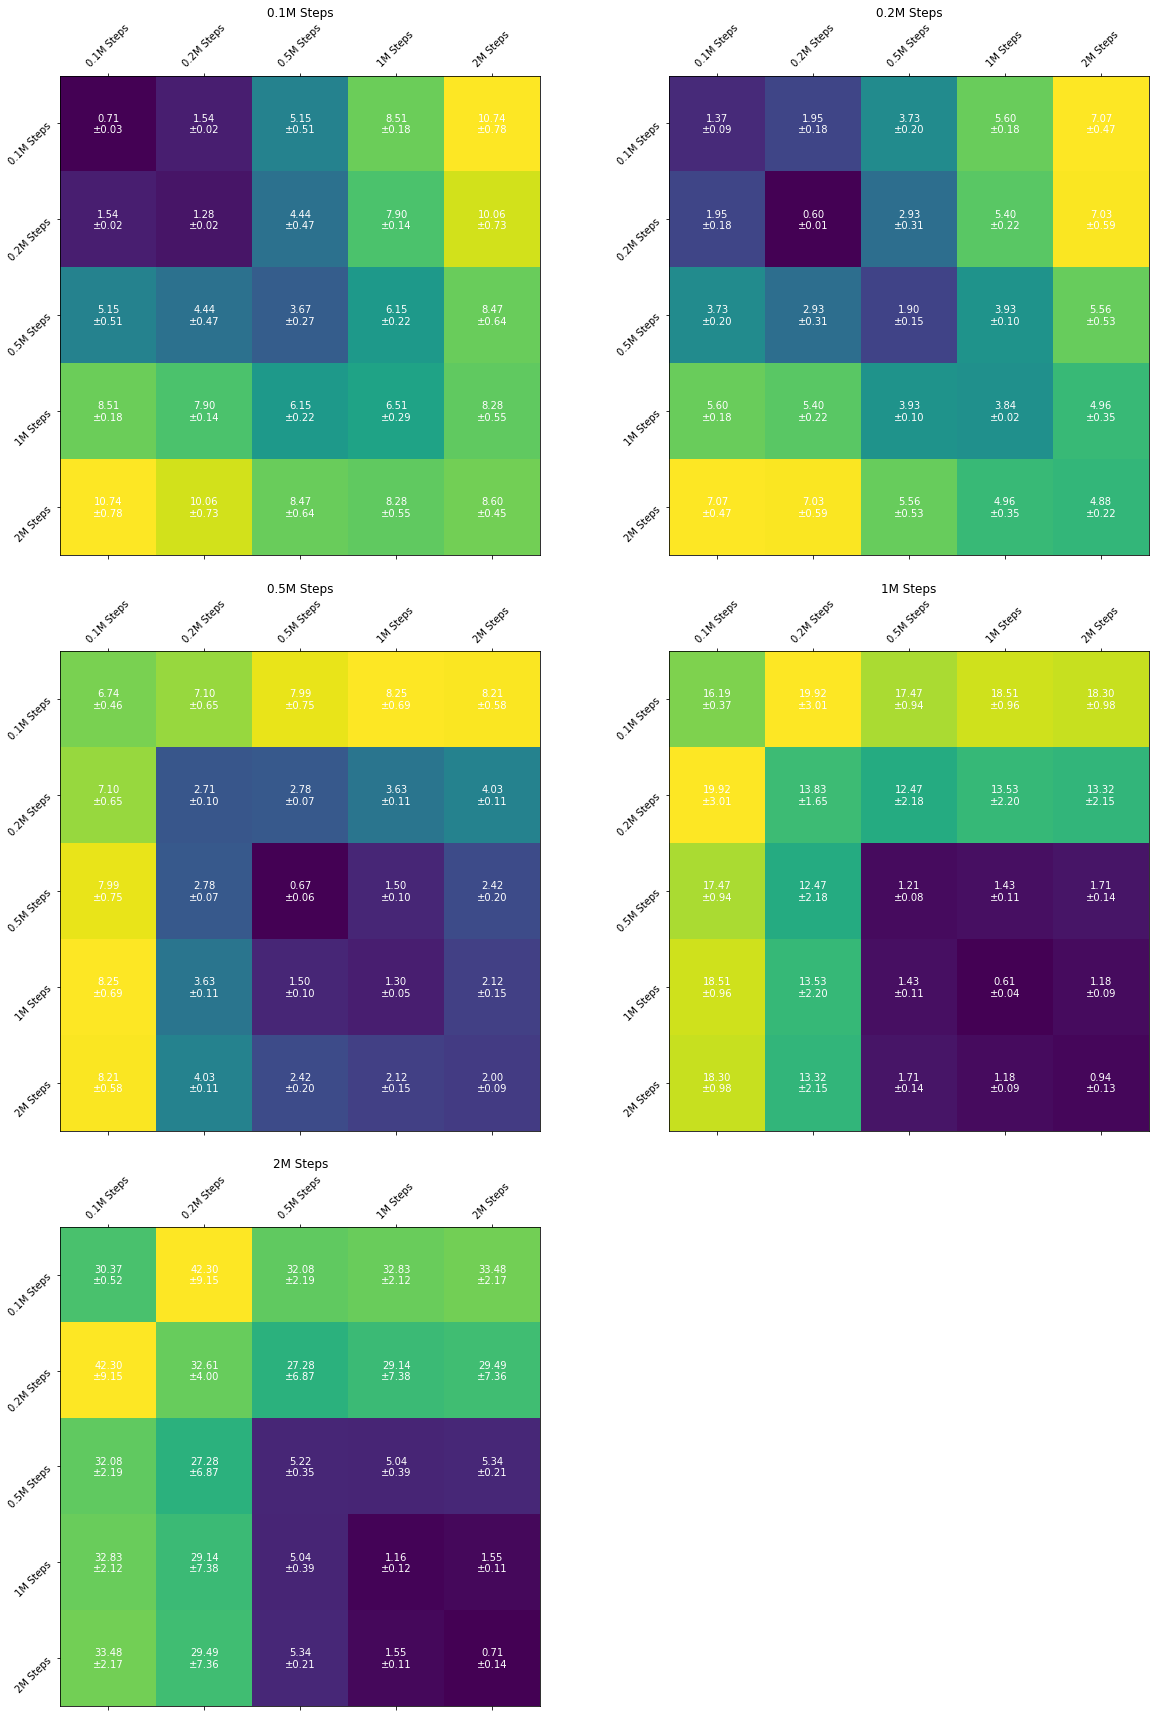

In [38]:
display_distances(d3rlpy_1_experiments, d3rlpy_1_wd_mean, d3rlpy_1_wd_std, shape=(3,2), dataset_labels=d3rlpy_experiment_labels)

# D3RLPY-PO

In [4]:
d3rlpy_01_po_experiments = {
    "D3RLPY-RT-PO-3,9-0.1M-1-P0_100000" : ['MP733', 'MP734', 'MP735'],
    "D3RLPY-RT-PO-3,9-0.2M-1-P0_100000" : ['MP736', 'MP737', 'MP738'],
    "D3RLPY-RT-PO-3,9-0.5M-1-P0_100000" : ['MP739', 'MP740', 'MP741'],
    "D3RLPY-RT-PO-3,9-1M-1-P0_100000" : ['MP742', 'MP743', 'MP744'],
    "D3RLPY-RT-PO-3,9-2M-1-P0_100000" : ['MP745', 'MP746', 'MP747'],
}
d3rlpy_experiment_labels = ['0.1M Steps', '0.2M Steps', '0.5M Steps', '1M Steps', '2M Steps']

In [5]:
d3rlpy_01_po_wd_mean, d3rlpy_01_po_wd_std = experiment_collection_distances(d3rlpy_01_po_experiments)

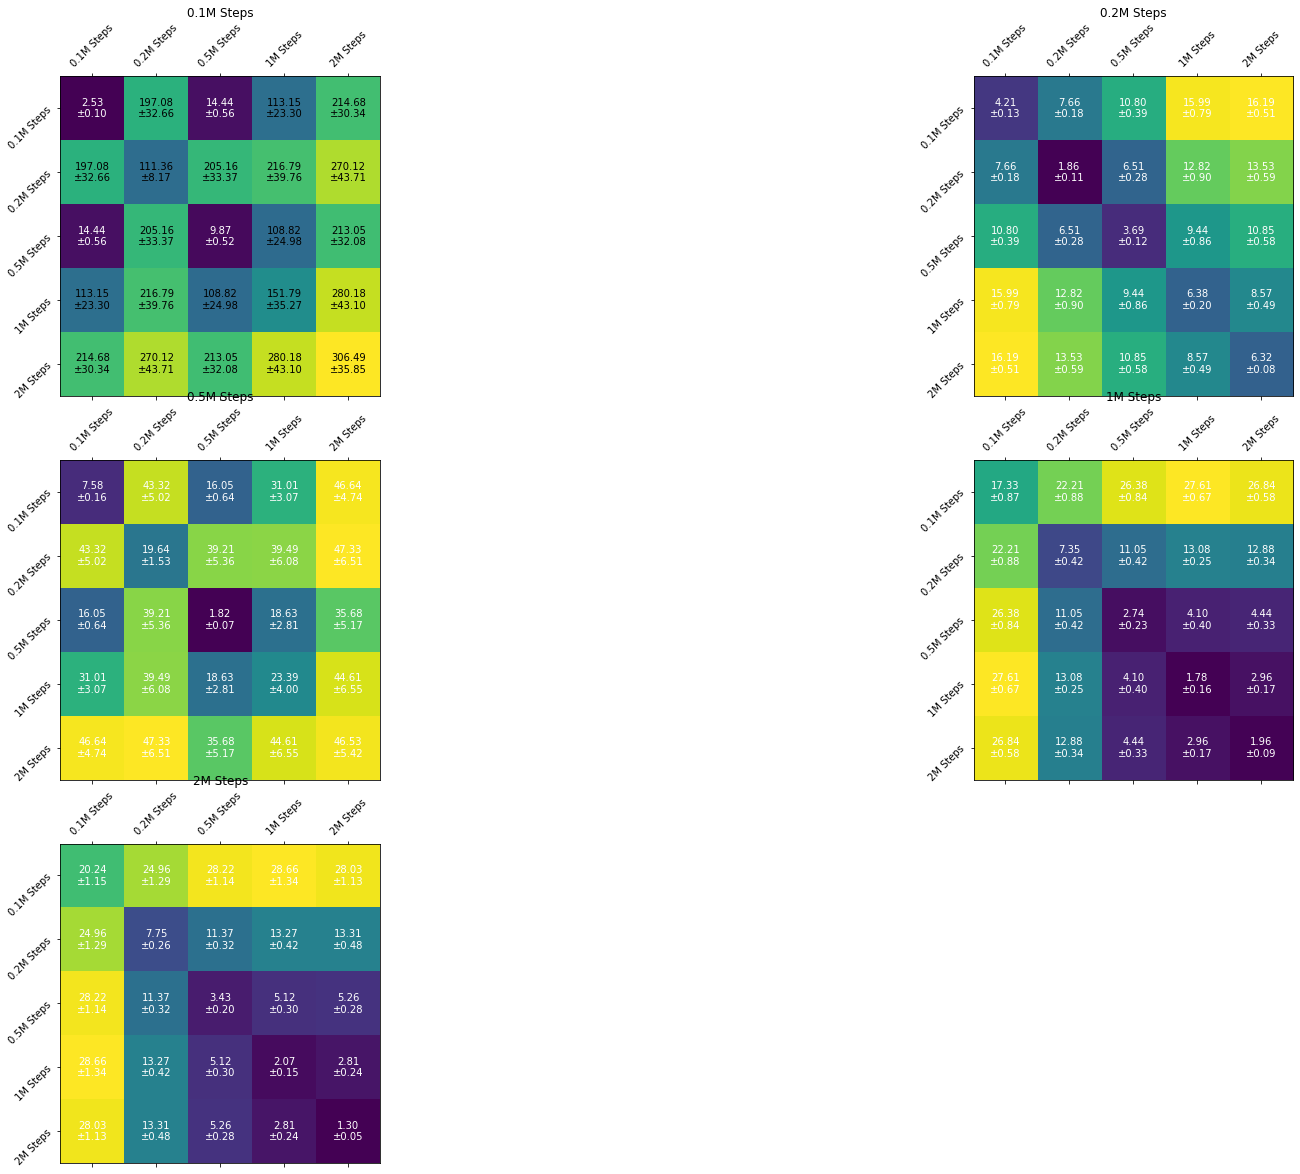

In [6]:
display_distances(d3rlpy_01_po_experiments, d3rlpy_01_po_wd_mean, d3rlpy_01_po_wd_std, shape=(3,2), dataset_labels=d3rlpy_experiment_labels)

# SAC

In [23]:
sac_01_experiments = {
    "SAC-RT-0.1M-0-P0_100000"  : ['MP674', 'MP675', 'MP676'],
    "SAC-RT-0.25M-1-P0_100000" : ['MP551', 'MP552', 'MP553'],
    "SAC-RT-0.5M-1-P0_100000"  : ['MP554', 'MP555', 'MP556'],
    "SAC-RT-1M-1-P0_100000"    : ['MP557', 'MP558', 'MP559'],
    "SAC-RT-2M-1-P0_100000"    : ['MP560', 'MP561', 'MP562'],
    "SAC-RT-3M-1-P0_100000"    : ['MP563', 'MP564', 'MP565'],
}
sac_experiment_labels = ['0.1M Steps', '0.25M Steps', '0.5M Steps', '1M Steps', '2M Steps', '3M Steps']

In [14]:
sac_01_wd_mean, sac_01_wd_std = experiment_collection_distances(sac_01_experiments)

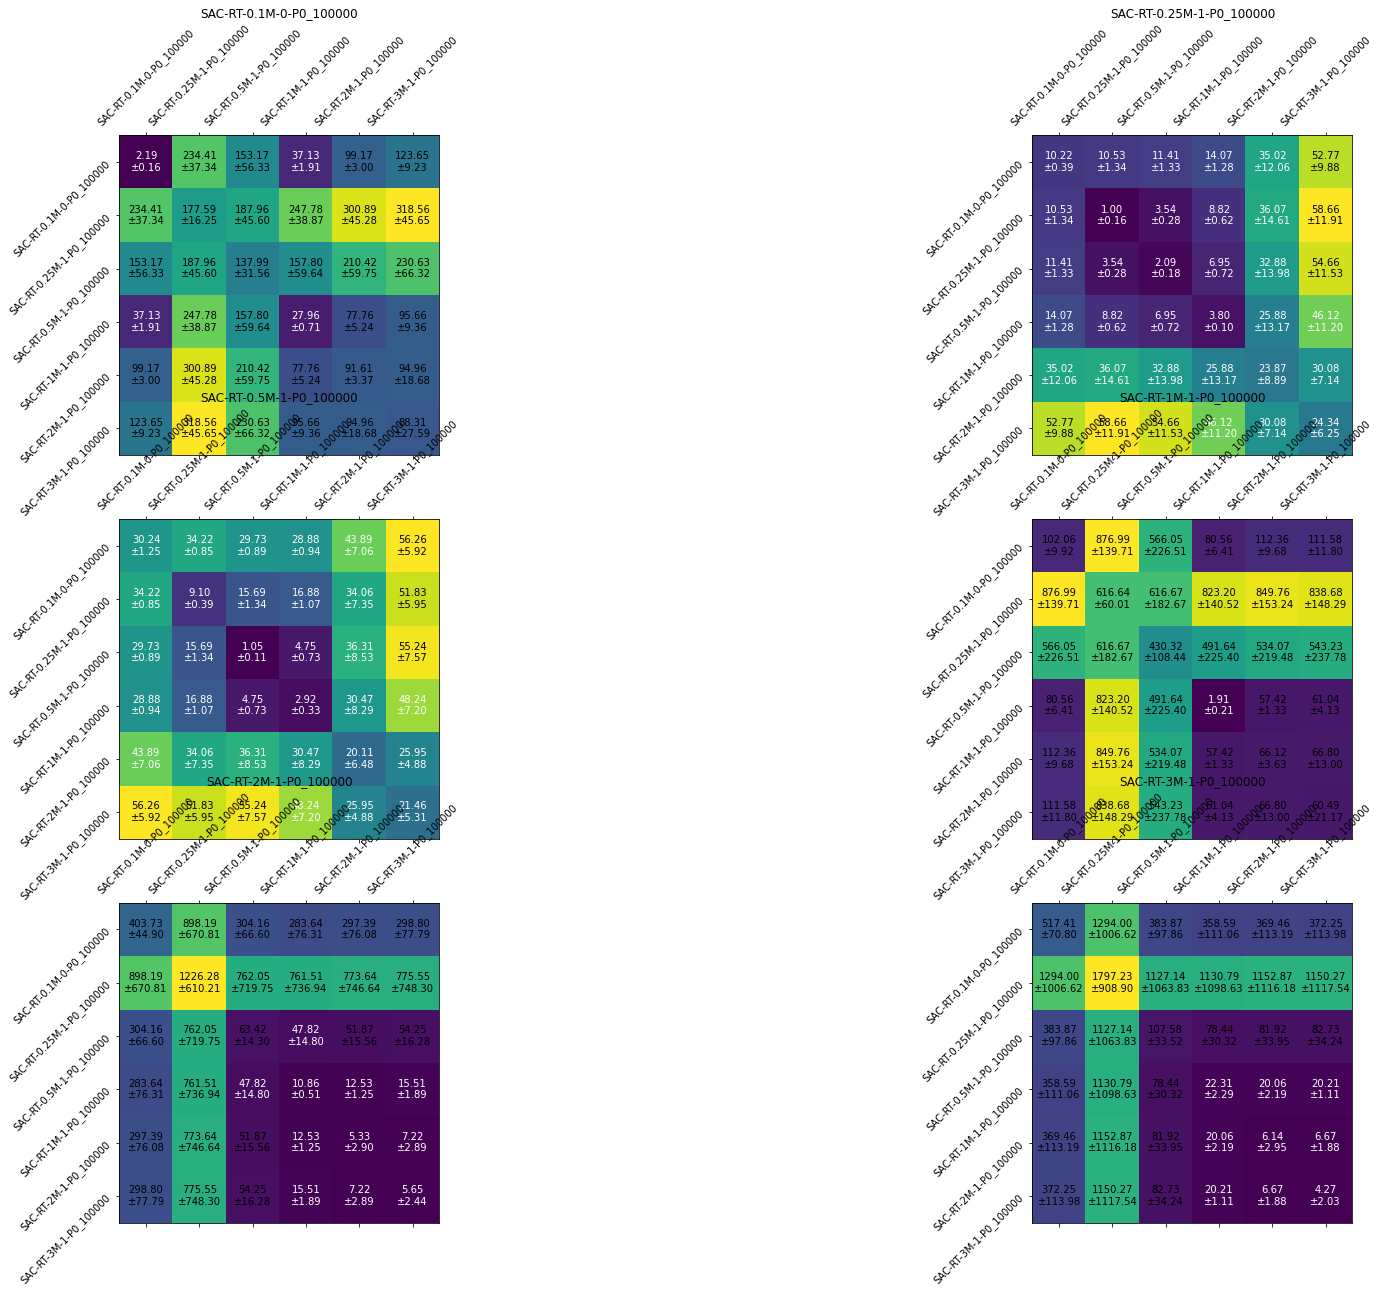

In [15]:
display_distances(sac_01_experiments, sac_01_wd_mean, sac_01_wd_std, shape=(3,2), dataset_labels=sac_experiment_labels)

In [16]:
# sac_1_experiments = {
#     "SAC-RT-0.1M-0-P0_1000000"  : ['MP683', 'MP684', 'MP685'],
#     "SAC-RT-0.25M-1-P0_1000000" : ['MP581', 'MP582', 'MP583'],
#     "SAC-RT-0.5M-1-P0_1000000"  : ['MP584', 'MP585', 'MP586'],
#     "SAC-RT-1M-1-P0_1000000"    : ['MP587', 'MP588', 'MP589'],
#     "SAC-RT-2M-1-P0_1000000"    : ['MP590', 'MP591', 'MP592'],
#     "SAC-RT-3M-1-P0_1000000"    : ['MP593', 'MP594', 'MP595'],
# }

In [17]:
# sac_1_wd_mean, sac_1_wd_std = experiment_collection_distances(sac_1_experiments)

In [18]:
# display_distances(d3rlpy_1_experiments, d3rlpy_1_wd_mean, d3rlpy_1_wd_std, shape=(3,2))

# MP4-PAP8

In [19]:
mp4_pap8_no_rex_experiments = {
    'D3RLPY-MP4-P0-3' : ['MP401', 'MP402', 'MP403'],
    'D3RLPY-MP4-P1-4' : ['MP413', 'MP414', 'MP415'],
    'D3RLPY-PAP8-P0-3': ['MP425', 'MP426', 'MP427'],
    'D3RLPY-PAP8-P1-4': ['MP437', 'MP438', 'MP439'],
}

mp4_pap8_rex_10_experiments = {
    'D3RLPY-MP4-P0-3' : ['MP410', 'MP411', 'MP412'],
    'D3RLPY-MP4-P1-4' : ['MP422', 'MP423', 'MP424'],
    'D3RLPY-PAP8-P0-3': ['MP434', 'MP435', 'MP436'],
    'D3RLPY-PAP8-P1-4': ['MP446', 'MP447', 'MP448'],
}

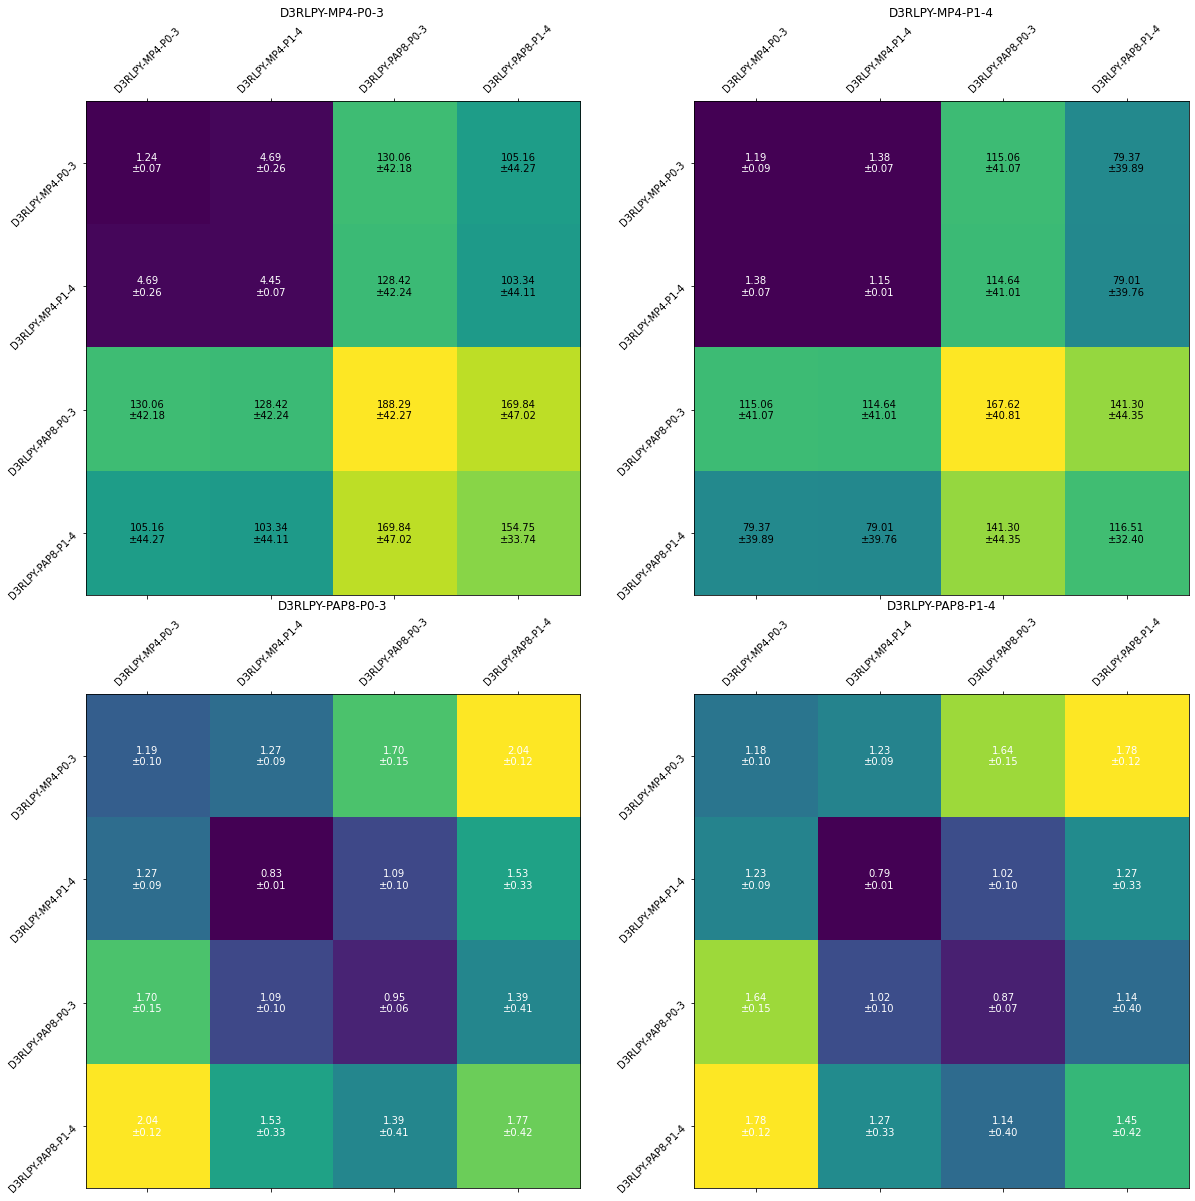

In [20]:
mp4_pap8_no_rex_wd_mean, mp4_pap8_no_rex_wd_std = experiment_collection_distances(mp4_pap8_no_rex_experiments)
display_distances(mp4_pap8_no_rex_experiments, mp4_pap8_no_rex_wd_mean, mp4_pap8_no_rex_wd_std)

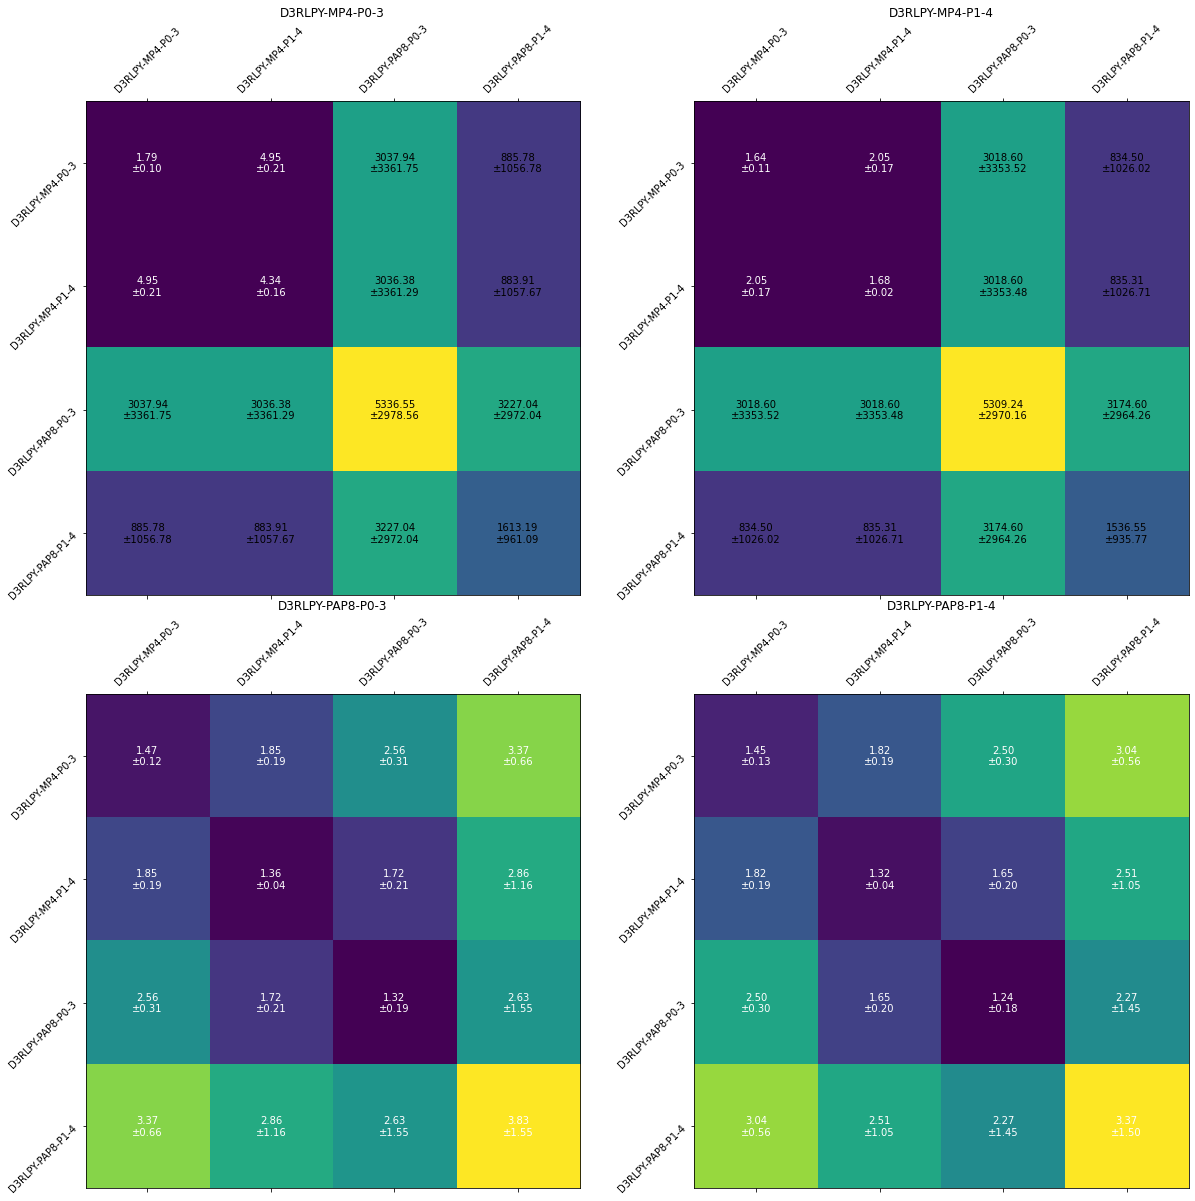

In [21]:
mp4_pap8_rex_10_wd_mean, mp4_pap8_rex_10_wd_std = experiment_collection_distances(mp4_pap8_rex_10_experiments)
display_distances(mp4_pap8_rex_10_experiments, mp4_pap8_rex_10_wd_mean, mp4_pap8_rex_10_wd_std)